# Project 1: Data analysis

## 1a) Bayesian approch

In order to predict the effect of genes on symptoms, we will use a simple Bayesian model. We consider these hypothesis:

$$\mu_0: P(symptoms|genes) = P(symptoms)$$
$$\mu_1: P(symptoms|genes) \neq P(symptoms)$$

In order words, does the genes have any effect on the symptoms or not? If it does, which genomes are the most relevant for the preventing the symptoms? 


We let Y be the symptoms and our X the genes. Y is an 8 bit vector for each observation,with 1 or zero for each bit. X is an 128 with the same charectaristic as Y.


The probability distribution of $ Y $ depends on an unknown parameter that we assume to be stochastic. We call this unknown parameter $\theta$ or $ p $. 

The formulation under is an alternative formulation of the the previous hypotesis. Does the parameter that the probability distribution of Y depend on, depend on X or not. $ \mu_0 $, our null, says that it does not. $\mu_1 $, the alternative hypothesis claims it does. We assume the Beta-Bernoulli model:
 
$$\mu_0: \theta^0 \sim Beta(\alpha^0 , \beta^0) ,  \ \ \  Y | \theta^0  $$
$$\mu_1: \theta^{1,x_t} \sim Beta(\alpha^{1,x_t} , \beta^{1,x_t}) , \ \ \ y_t | x_t \sim bernoulli(\theta^{1,x_t}) $$
 

Given the data, D, we try to estimate

$$ P(\mu | D) = \frac{P_{\mu} (D) \cdot \xi(\mu)}{\sum_{i=1} ^n P_{\mu_1}(D) \cdot \xi(\mu_1)} $$

We can either set $P(\mu | D)$ to mean $P(\mu_1 | D)$ or  $P(\mu_0 | D)$ depending on which hypothesis we want to check the posterior belief of. 

We let $P_{\mu} (D) = P(\mu |D)$, $D = (x_t, y_t,x_{t-1},y_{t-1})_{t=1} ^T $ for a spesific gene, and let $x_t$ be the value of the gene for observation t (0  or 1), $x_{t-1}$ is a vector of all the previous values of the previous observation up to t-1,  $y_t$ is the the value of symptom Y for observation t (0 or 1),$y_{t-1}$ is a vector of all the previous values of the previous observations including t-1 and $\mu$ is one of the hypothesis in the set {$\mu_1$,$\mu_0$}.  We assume that the different observations(rows) of the data are independent of each other. This gives us:
$$ P_{\mu}(D) = P(y_1,...,y_t \cup x_1,...,x_t)$$

$$ = \prod_{i=1}^{t} P(y_i | x_i,x_{i-1} , y_{i-1}) $$


With these assumptions, we can estimate the terms in the $P_{\mu} (D)$ by 
$$ P(y_t | x_t,x_{t-1} , y_{t-1}) = \int_{\theta} P_{\theta}(y_t|x_t) \cdot \xi(\theta|x_{t-1},y_{t-1})$$

We calculate the likehood of adding a new observation(row) using this formula. It works if we assume that the the next observation is independent from the previous observations.


This is the marginal likelihood(posterior predictive distribution) which is a compound distribution,which is used to calculate $P(y_t | x_{t},x_{t-1}, y_{t-1})$. The probabilty $P(y_t | x_{t})$ is stochastic in $\theta$, so we have to integrate over all values of $\theta$. Every time a new observation is added we calculate $P(y_t | x_{t},x_{t-1}, y_{t-1})$,and recalculate $$ = \prod_{i=1}^{t} P(y_i | x_i ,x_{i-1}, y_{i-1}) $$. 

So to calculate $$ P(\mu | D) = \frac{P_{\mu} (D) \cdot \xi(\mu)}{\sum_{i=1} ^n P_{\mu_i}(D) \cdot \xi(\mu_i)} $$, we are sequentially updating our belief every time a new observation is added. For every update $\xi(\mu)$, $P(\mu | D)$ is from the previous iteration, exept for the first one. $\xi(\mu)$ will cancel because it's constant.

This integral simplifies to:

$$ P(y_t | x_{t},x_{t-1},y^{t-1}) = \int_{\theta} P_{\theta}(y_t) \cdot d \xi(\theta|y^{t-1}) = \frac{\alpha_{t,x_t}}{\alpha_{t,x_t} + \beta_{t,x_t}}$$


Looking at $\mu_1$ we are using the Beta-Bernoulli distribution. Its a binomial distribution where the probability of success at each of n trials is not fixed but comes from a Beta distribution. The Bernoulli distribtuion is a special case of the binomial distribution, where number of trials is equal to 1.

We are doing this because our y's are either 1 or 0. It is then reasonable to assume that $Y|X$ is Bernoulli distributed.

It is also conviniant because of its conjugate prior property. Now we can calculate $P( D | \mu_1) = \prod_{i=1}^{t} P(y_i | x^i ,x^{i-1}, y^{i-1}) $ beacuse we know that the marginal likelihood (posterior predictive dist) is composed of a Bernoulli distribution and a Beta dist $ P(y_t | x^t , y^{t-1}) = \int_{\theta} P_{\theta}(y_t|x_t) \cdot \xi(\theta|x^{t-1},y^{t-1})$, which is beta distributed. For each iteration we end up getting that $P_{\mu} (D)$ is Beta distributed.

The same integral calculation is done for $P(D | \mu_0)$ but now the marginal likelihood is independent of the data.

Instead of calculating $P(D |\mu_1) = \prod_{i=1}^{t} P(y_i | x_i ,x_{i-1}, y_{i-1})$, we can first calculate $log(P(  D|\mu_1))$ and then do $e^{log(P(D|\mu_1))}$,same for $P(D | \mu_0)$.

To summarize, we have a set of hypotesis. In this case two. We want to find how accurate they are, so we have a prior beleif on the strength of the hypothses which we express through a probability. We then want to update our belief of the hypotesis (posterior belief). In other words what is the probability of the choosen hypotesis given the data. We only have to compute one of the probabilities because $P(\mu_1)= 1 - P(\mu_0)$.

The calculation is done sequentially. For each iteration we get a new data observation.A new row of genes.We continously update the posterior belief,for all genes,and put the posterior belief of each gene into a list. The belief get updated through calculating the marginal likelihood every time a new row is added and a product is taken between this marginal likelihood and all the presious marginal likelihood calculations bought for $P(  D|\mu_1)$ and for$P(  D|\mu_0)$ this is then put into the bayes formula $ P(\mu | D) = \frac{P_{\mu} (D) \cdot \xi(\mu)}{\sum_{i=1} ^n P_{\mu_i}(D) \cdot \xi(\mu_i)} $.

We want to find this probability for for each of the genes.This procedure is done for each gene.For each gene if the posterior probabilty is greater then some trechhold we add this gene to the list of important genes that are relvant for explaining that spesific symptom.
 



The decision rule can be defined as

$$ \mu =   \left\{
\begin{array}{ll}
      \mu_1 & P(\mu_1|D) > s \\
      \mu_0 & else
\end{array} 
\right.  $$

where $s$ is a given threshold.

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint

In [359]:
#from sklearnex import patch_sklearn
#patch_sklearn()

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
cols = (['Covid-Recovered', 'Covid-Positive', 'No-Taste/Smell', 'Fever', 'Headache', 'Pneumonia', 'Stomach', 'Myocarditis', 'Blood-Clots', 'Death', 
        'Age', 'Gender', 'Income'] + 
         [f'Gene_{i+1:03}' for i in range(128)] + 
         ['Asthma', 'Obesity', 'Smoking', 'Diabetes', 'Heart disease', 'Hypertension',
         'Vacc_1', 'Vacc_2', 'Vacc_3'])


In [5]:
obs_data = pd.read_csv("observation_features.csv")
treat_data = pd.read_csv("treatment_features.csv") 
action_data = pd.read_csv("treatment_actions.csv")
outcome_data = pd.read_csv("treatment_outcomes.csv") 

obs_data.columns = cols
treat_data.columns = cols
outcome_data.columns = cols[:10]
action_data.columns = ['Treatment_1', 'Treatment_2']

In [6]:
#samples with vaccinations or not:
vacced = obs_data[np.sum(obs_data.iloc[:,-3:], axis=1) == 1]
vacced_neg = vacced[vacced.iloc[:,1]==0]
vacced_pos = vacced[vacced.iloc[:,1]==1]

un_vacced = obs_data[np.sum(obs_data.iloc[:,-3:], axis=1) == 0]
un_vacced_neg = un_vacced[un_vacced.iloc[:,1]==0]
un_vacced_pos = un_vacced[un_vacced.iloc[:,1]==1]

symptom_names = ['Covid-Recovered', 'Covid-Positive', 'No-Taste/Smell', 'Fever', 'Headache', 'Pneumonia', 'Stomach', 'Myocarditis', 'Blood-Clots', 'Death']
prior_probs= [np.sum(obs_data.iloc[:,i]) / len(obs_data) for i, key in enumerate(symptom_names)]


In [363]:
class Pipeline:
    
    def __init__(self, X, y, random_state=None):
        self.X = X
        self.y = y
        self.random_state = random_state
        self.best_features = None
    
    def generate_binary_data(self, num_features, N):
        """
        From a number of features and one correlation vector,
        create a data set with N observations and num_features,
        with one target column that correlates with the features,
        as given in the correlation vector"""
        
        return pd.DataFrame(np.random.choice(2, size=(N, num_features)))
    
    
    def select_features(self, X, Y, threshold):
        """ Select the most important features of a data set, where X (2D)
        contains the feature data, and Y (1D) contains the target
        """
        X, Y = np.array(X), np.array(Y)
        
        n_features = X.shape[1]
        n_data =  X.shape[0]
        alpha_b = np.ones([n_features, 2 ])
        beta_b = np.ones([n_features, 2])
        log_p = np.zeros(n_features)

        log_null = 0
        alpha = 1
        beta = 1  
        for t in range(n_data):
            p_null = alpha / (alpha + beta)
            log_null += np.log(p_null)*Y[t] + np.log(1-p_null)*(1 - Y[t])
            alpha += Y[t]
            beta += (1 - Y[t])
            for i in range(n_features):

                    x_ti = int(X[t,i])
                    p = alpha_b[i, x_ti] / (alpha_b[i, x_ti] + beta_b[i, x_ti])
                    log_p[i] += np.log(p)*Y[t] + np.log(1-p)*(1 - Y[t])
                    alpha_b[i, x_ti] += Y[t]
                    beta_b[i, x_ti] += (1 - Y[t])
        log_max=np.mean(log_p)
        log_max2=np.mean(log_null)
        log_p=log_p-log_max
        log_null=log_null-log_max2
        #p = np.exp(log_p) / (np.exp(log_p) + np.exp(log_null))
        p = 1 / (np.exp(log_null - log_p) + 1)
        #print(f"{(log_p)=}\n{(log_null)=}\n{(log_p) + (log_null)=}\n {p=}")
        #print(f"{np.exp(log_p)=}\n{np.exp(log_null)=}\n{np.exp(log_p) + np.exp(log_null)=}")

        features = [i for i in range(n_features) if p[i] > threshold]
        
        self.best_features = features

        return features
    
        
    def tune_parameters(self, X, y, clf, parameter_grid, scoring=None, cv=None):
        """ Given X, y, a classifier and a parameter grid, 
        find the best parameters for the classifier and data using GridSearch
        with cross validation.
        """
        # The code below is from
        # https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=self.random_state)

        print(f"# Tuning hyper-parameters for {scoring=}")
        print()
        

        grid_clf = GridSearchCV(clf, 
                                parameter_grid, 
                                scoring=scoring,
                                n_jobs=-1,
                                cv=cv
                            ).fit(X_train, y_train)

        #piped_clf

        print("Best parameters set found on development set:")
        print()
        print(f"{grid_clf.best_params_}, score: {grid_clf.best_score_:.4f}")
        print()

        print("Classification report:")
        print()

        print(classification_report(y_test, grid_clf.predict(X_test)))
        print()
        
        
    def find_alpha(self, beta,p):
        """ Given beta and a mean probability p, compute and return the alpha of a beta distribution. """
        return beta*p/(1-p)

    def find_efficacy(self, group_pos: pd.DataFrame, group_neg: pd.DataFrame, symptom, prior_probs, log=True):
        if isinstance(symptom, int):
            symptom_index = symptom
            symptom_name = group_pos.keys()[symptom]
        else:
            symptom_name = symptom
            symptom_index = list(group_pos.keys()).index(symptom)
        
        group_pos_count = np.sum(group_pos[symptom_name] * group_pos.iloc[:,1])
        group_neg_count = np.sum(group_neg[symptom_name] * group_neg.iloc[:,1])

        v = group_pos_count/len(group_pos)
        n_v = group_neg_count/len(group_neg)

        if n_v == 0:
            print(f'{v=}, {n_v=}: Division by zero')
            return

        IRR = v/n_v

        #print(v, n_v)
        efficacy = 100*(1- IRR)

        N = 100_000
        beta = 1
        p = prior_probs[symptom_index]
        alpha = self.find_alpha(beta,p)

        samples_group_pos = stats.beta.rvs(alpha + group_pos_count, beta + len(group_pos) - group_pos_count, size=N)
        samples_group_neg = stats.beta.rvs(alpha + group_neg_count, beta + len(group_neg) - group_neg_count, size=N)

        samples_ve = 100 * (1 - samples_group_pos/samples_group_neg)
        lower = np.percentile(samples_ve, 2.5)
        upper = np.percentile(samples_ve, 97.5)
        
        if log is True:
            print(f'{symptom_name:15s}: {efficacy:3.3f} - ({lower:3.3f}, {upper:3.3f})')
        
        return efficacy, (lower, upper)
        
        
        
    def side_effects(self, vacced_neg, un_vacced_neg, start, end):
        df = pd.DataFrame(index=vacced_neg.keys()[start:end], 
                          columns = ("p1 (%)", "p2 (%)", "Diff (%)", "Credible Interval (%)", "Null Hypothesis", ),
                         )
        
        for i in range(start, end):
            symptom = vacced_neg.keys()[i]
            p1 = vacced_neg.sum()[symptom] / len(self.y) / (len(vacced_neg) / len(self.y))
            p2 = un_vacced_neg.sum()[symptom] / len(self.y) / (len(un_vacced_neg) / len(self.y))
            
            
            
            lower = (p1-p2 - 1.64 * np.sqrt((p1*(1-p1) / len(vacced_neg)) + (p2 * (1-p2) / len(un_vacced_neg))))
            higher = (p1-p2 + 1.64 * np.sqrt((p1*(1-p1) / len(vacced_neg)) + (p2 * (1-p2) / len(un_vacced_neg))))
            
            p1, p2, lower, higher = p1 * 100, p2 * 100, lower * 100, higher * 100
            
            df.loc[symptom] = [round(p1, 4), round(p2, 4), round(p1 - p2, 4), (round(lower, 4), round(higher, 4)),
                               "rejected" if lower>0 else "not rejected", ]
            
            
        return df
    
    
    def treatment_efficacy(self, outcome_treated, precondition_treated, outcome_untreated, 
                           precondition_untreated, p, symptom_name, log=True):
        group_pos_count = np.sum(outcome_treated[symptom_name])
        group_neg_count = np.sum(outcome_untreated[symptom_name])

        group_pos_total = np.sum(precondition_treated[symptom_name])
        group_neg_total = np.sum(precondition_untreated[symptom_name])

        if any(v == 0 for v in (group_pos_total, group_neg_total, group_neg_count)):
            print(f'{symptom_name:15s}: Division by zero - not enough data to compute efficacy' )
            return

        v = group_pos_count / group_pos_total
        n_v = group_neg_count / group_neg_total

        #print(f"{group_pos_count=}, {group_pos_total=}\n{group_neg_count=} {group_neg_total=}\n,{v=}, {n_v=}")

        IRR = v/n_v

        efficacy = 100 * (1- IRR)

        N = 100_000
        beta = 1
        alpha = self.find_alpha(beta,p)

        #symptom_name = symptom_names[symptom_index]

        samples_group_pos = stats.beta.rvs(alpha + group_pos_count, beta + len(outcome_treated) - group_pos_count, size=N)
        samples_group_neg = stats.beta.rvs(alpha + group_neg_count, beta + len(outcome_untreated) - group_neg_count, size=N)

        samples_ve = 100 * (1 - samples_group_pos/samples_group_neg)
        lower = np.percentile(samples_ve, 2.5)
        upper = np.percentile(samples_ve, 97.5)
        if log is True:
            print(f'{symptom_name:15s}: {efficacy:7.3f} - 95% CI: ({lower:3.3f}, {upper:3.3f})')    
        
        return efficacy, (lower, upper)

    def bootstrap(self, X=None, y=None, N=None):
        if X is None and y is None:
            X = self.X
            y = self.y
        
        if y is None:
            return resample(X, n_samples=N)
        
        return resample(X, y, n_samples=N)
    
    
        

In [364]:
pipe = Pipeline(un_vacced_pos.iloc[:,13:147], un_vacced_pos['Blood-Clots'], random_state=42)

In [368]:
def select_features_example(pipeline, X=None, y=None, N=1000, synthetic=True, scoring=None, imbalanced=False):
    """"""
    
    parameter_grid = [{'classify__C': [0.01, 0.1,1, 10,],
                      },]
    
    if X and y:
        best_features = pipe.select_features(X, y, 0.8)
        pass
    
    # Give some (hard-coded) correlation to 1st and 2nd feature for the synthetic dataset.
    elif synthetic is True:
        X = pipe.generate_binary_data(100, N)
        y = (X[0] * np.random.choice(2, N, (0.1, 0.9))) | (X[1] * np.random.choice(2, N, (0.4, 0.6)))
        best_features = pipe.select_features(X, y, 0.8)
    else:
        X, y = pipe.X, pipe.y
        
        best_features = pipe.best_features or pipe.select_features(X, y, 0.8)
    print(f"{best_features=}\nfeature names = {X.keys()[best_features]}")
    
    
    
    if imbalanced is True:
        model = ImbPipeline([
            ('sampling', SMOTE(n_jobs=-1)),
            ('classify', LogisticRegression(n_jobs=-1))
        ])
        parameter_grid[0].update({"sampling__sampling_strategy": [0.3, 0.4, 0.5]})
        
    
    else:
        model = ImbPipeline([
            ('classify', LogisticRegression(n_jobs=-1))
        ])

        


    
    print("Classification using best features")
    pipeline.tune_parameters(X.iloc[:, best_features], y, model, parameter_grid=parameter_grid, scoring=scoring)

    
    print("Classification using all features")    
    pipeline.tune_parameters(X, y, model, parameter_grid=parameter_grid, scoring=scoring)


In [372]:
select_features_example(pipe, synthetic=False, scoring='f1_macro', imbalanced=True)

best_features=[2, 15, 36, 72, 81, 91, 95, 103]
feature names = Index(['Gene_003', 'Gene_016', 'Gene_037', 'Gene_073', 'Gene_082', 'Gene_092',
       'Gene_096', 'Gene_104'],
      dtype='object')
Classification using best features
# Tuning hyper-parameters for scoring='f1_macro'

Best parameters set found on development set:

{'classify__C': 0.1, 'sampling__sampling_strategy': 0.5}, score: 0.5056

Classification report:

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2404
         1.0       0.12      0.05      0.07       127

    accuracy                           0.93      2531
   macro avg       0.53      0.51      0.52      2531
weighted avg       0.91      0.93      0.92      2531


Classification using all features
# Tuning hyper-parameters for scoring='f1_macro'

Best parameters set found on development set:

{'classify__C': 0.1, 'sampling__sampling_strategy': 0.4}, score: 0.5094

Classification report:

              preci

The results above show that using only the 2 features that the select_features function returned, gives the same or better results than using all 100 features of the synthetic dataset, when there is a high correlation between the target and those two features, and the other features are completely random.

Because the given data is unbalanced, it is hard to see how the classifier using only the selected features works compared to one using all the features. We have tried some kind of sampling strategy using the imblearn python library to alleviate some of the challenges of using such an imbalance dataset. The sampler we have used is an over-sampler called SMOTE. Using this sampler with the right grid search parameters and scoring metrics we have managed to correctly classify some of the positive targets without losing too much of the accuracy metric.

In [242]:
def vaccine_efficacy_example(pipeline, num_experiments=100, N=100000, p=0.9):
    """ Here p is the chance that a vaccinated person does not get symptom
    and that a non-vaccinated person does get the symptom.
    p = 0.5 would mean no effect, as both groups would be equally susceptible
    """
    
    X = pipeline.generate_binary_data(1, N)
    
    # Need to set symptom y by 'flipping' a random amount of vaccination bits
    y = (np.random.choice(2, size=N, p=(1-p, p)) ^ X[0])
    X = X.assign(Target=y)
    
    prior_probs = [0, np.sum(X.Target) / len(y)]
    
    # Partition X and y into vaccinated and non-vaccinated groups
    pipeline.find_efficacy(X[X[0] == 1], X[X[0] == 0], 'Target', prior_probs)
    
    return X
    
    
def test_vaccine_efficacy(pipeline, num_experiments=100, N=10000, p=0.9):
    """ Here p is the chance that a vaccinated person does not get symptom
    and that a non-vaccinated person does get the symptom.
    p = 0.5 would mean no vaccine effect, as both groups would be equally susceptible to the symptom
    """
    
    all_X = pipeline.generate_binary_data(1, N)
    
    # Need to set y by 'flipping' a random amount of vaccination bits
    all_y = (np.random.choice(2, size=N, p=(1-p, p)) ^ all_X[0])
    all_X = all_X.assign(Target=all_y)
    
    prior_probs = [0, np.sum(all_X.Target) / N]
    
    results = pd.DataFrame(columns=["Efficacy", "CI low", "CI high"], dtype=np.float64)
    
    for i in range(num_experiments):
        # Need to set y 'manually' here
        X = pipeline.bootstrap(all_X)
        
        # Partition X  into the groups where vaccine is given or not given, and test efficacy
        eff, (low, high) = pipeline.find_efficacy(X[X[0] == 1], X[X[0] == 0], 'Target', prior_probs, log=False)
        
        results.loc[i] = [eff, low, high]
    
    pprint(pd.DataFrame({'Mean': results.mean(), 'std': results.std()}))
    
    results.plot.hist(alpha = 0.8)
    
    return results

In [233]:
t = treatment_efficacy_example(pipe, p=0.9)

Target         :  90.385 - 95% CI: (89.508, 91.869)


In [234]:
X = vaccine_efficacy_example(pipe, p=0.6)


Target         : 32.635 - (31.760, 33.497)


In [53]:
symptoms = np.array(obs_data.iloc[:,0:10])
age = obs_data.iloc[:,10]
gender = obs_data.iloc[:,11]
income = obs_data.iloc[:,12]
genome = obs_data.iloc[:,13:141]
comorbidities = obs_data.iloc[:,141:147]
vaccination_status = obs_data.iloc[:,147:]

In [118]:
select_0 = select_features(np.array(un_vacced_pos.iloc[:,13:147]),np.array(un_vacced_pos['No-Taste/Smell']), 0.8)

In [119]:
select_0

[19, 53, 60, 76, 85, 96, 120]

## 1b) Estimating the efficacy of vaccines

We estimate the efficacy of the vaccines by
$$ 100 \cdot (1-IRR)$$
where IRR is the ratio of the vaccinated incidence rate and not vaccinated incidence incidenes ([link](https://www.nejm.org/doi/full/10.1056/NEJMoa2034577)). This means that the relationship we model for each symptom is as given below:

$r_v = P(symptom = 1 | vaccine = 1)$ and

$r_n = P(symptom = 1 | vaccine = 0)$

to obtain $IRR = 100 * [1 - r_v / r_n]$

We obtain a Bayesian estimate of $r_v, r_n$
through the Beta-Bernoulli conjugate prior.

As in the abovementioned article, we use a Bayesian Beta-Binomial model. Hence, our prior belief is assumed to have a Beta distribution and the Likelihood of observed data is Binomial distributed. This results in a Beta-distributed posterior (more details will follow afterwards).

We set a low beta value for the prior distribution because we are uncertain about the actual distribution and compute a mean prior probability of each symptom from the data. Given the beta value of 1 and the mean probability, we compute the alpha value using the function alpha = beta \* p/(1-p), which for p in (0, 0.5] returns an alpha in (0, 1]. If p is 0.5 this would make the beta distribution uniform, with alpha = beta = 1.



In [54]:
print("Efficacy of the vaccinated:")
for i, s in enumerate(symptom_names):
    pipe.find_efficacy(vacced,un_vacced,i,prior_probs)
    

Efficacy of the vaccinated:
Covid-Recovered: 28.965 - (20.081, 36.795)
Covid-Positive : 21.464 - (19.623, 23.278)
No-Taste/Smell : 47.521 - (41.614, 52.843)
Fever          : 51.575 - (44.921, 57.437)
Headache       : 45.473 - (28.902, 58.351)
Pneumonia      : 57.810 - (51.547, 63.292)
Stomach        : 50.542 - (25.840, 67.458)
Myocarditis    : 44.531 - (28.377, 57.039)
Blood-Clots    : 57.190 - (50.887, 62.762)
Death          : 93.394 - (90.560, 95.678)


In [55]:
prior_probs = [0.1] * 10

for name in vaccination_status:
    print(name)
    for i, s in enumerate(symptom_names):
        pipe.find_efficacy(obs_data[vaccination_status[name] == 1], un_vacced, i, prior_probs)
    print()

Vacc_1
Covid-Recovered: 19.633 - (6.111, 31.497)
Covid-Positive : 11.296 - (8.518, 14.003)
No-Taste/Smell : 34.419 - (24.588, 43.191)
Fever          : 43.590 - (32.843, 53.051)
Headache       : 30.767 - (2.434, 52.176)
Pneumonia      : 54.129 - (44.246, 62.752)
Stomach        : 28.704 - (-17.458, 59.081)
Myocarditis    : 36.093 - (10.361, 55.738)
Blood-Clots    : 48.746 - (38.217, 57.913)
Death          : 95.704 - (91.455, 98.394)

Vacc_2
Covid-Recovered: 28.837 - (16.393, 39.820)
Covid-Positive : 20.584 - (17.966, 23.125)
No-Taste/Smell : 43.109 - (34.042, 51.215)
Fever          : 45.703 - (35.141, 54.914)
Headache       : 39.907 - (14.081, 59.237)
Pneumonia      : 48.345 - (37.704, 57.614)
Stomach        : 70.324 - (42.163, 87.305)
Myocarditis    : 35.284 - (9.478, 54.885)
Blood-Clots    : 47.762 - (37.177, 57.039)
Death          : 92.922 - (87.675, 96.555)

Vacc_3
Covid-Recovered: 38.211 - (26.774, 48.246)
Covid-Positive : 32.271 - (29.911, 34.592)
No-Taste/Smell : 64.686 - (57.883,

Below the function for computing vaccine efficacy is tested using a case where the efficacy should be 0%, and a test where the efficacy whould approach 90%. These tests are done by generating a big synthetic dataset with the needed features and correlating targets, and then test the functions several times using bootstrapping. The results of the test are served  

This test should give efficacy of around 0%

              Mean       std
Efficacy -1.958795  1.980951
CI low   -6.035751  2.067987
CI high   1.958043  1.901621


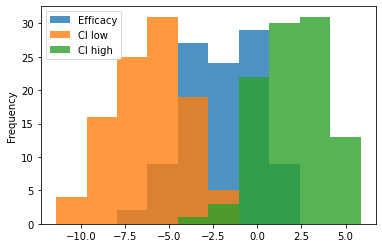

This test should give efficacy of almost 90%

               Mean       std
Efficacy  88.912360  0.424885
CI low    87.948176  0.441225
CI high   89.802744  0.408526


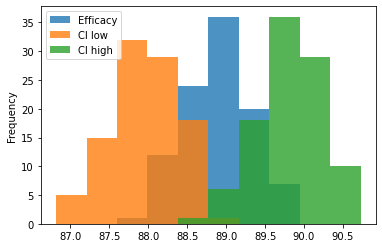

In [243]:
print("This test should give efficacy of around 0%\n")
t = test_vaccine_efficacy(pipe, p=0.5)

plt.show()
print("This test should give efficacy of almost 90%\n")
t = test_vaccine_efficacy(pipe, p=0.9)

## 1c) Estimating the probability of vaccination side-effects.

Using the Bayes theorem, we will estimate the probability of vaccination side-effects. In other words, the probability of getting symptoms given that a person is vaccinated and has tested negative.
$$p_1 = P(symptom | vaccine,covid') = \frac{P(symptom \cap vaccine,covid')}{P(vaccine,covid')} $$
$$p_2 = P(symptom | vaccine',covid') = \frac{P(symptom \cap vaccine',covid')}{P(vaccine',covid')} $$

We want to test the following hypothesis:
$$ h_0: p_1 - p_2 \leq 0 $$
$$h_a: p_1 - p_2 > 0 $$

We make a confidence intervall for each symptom, and reject the null hypothesis if confidence intervall does not include zero. 

**A large-sample 95% confidence interval for $p_1 - p_2$**:

In this task it seems appropiate to estimate confidence intervalls instead of doing the task of comparison through hypotesis testing.





The variables X and Y  represents the number of individuals in each sample having a certain  characteristic that defines $p_1$ and $p2$.Provided the population sizes are much larger than the sample sizes, the distribution
of X can be choosen to be binomial with parameters m and $p_1$, and similarly, Y is choosen
to be a binomial variable with parameters n and $p_2$. The samples are assumed to be independent of each other.Therefore X and Y are independent rv’s.

The estimator for $ p_1-p_2 $, the difference in population proportions, is
the  difference in sample proportions $\frac{X}{m} - \frac{Y}{n}$ .  $ \hat{p_1} = \frac{X}{m}$ and
$\hat{p_2} = \frac{Y}{m}$, the estimator of $ p_1-p_2 $ can be expressed as $\hat{p_1} - \hat{p_2}$.

$E[\hat{p_1} - \hat{p_2}]=p_1-p_2$ so $\hat{p_1} - \hat{p_2}$ is an unbiased estimate of $p_1-p_2$ 

$\hat{p_1}=\frac{X}{m}$ and $\hat{p_2}=\frac{y}{n}$ are aproximately normal distributed when m and n are large.


Refrence: Modern Mathematical Statistic with applications.

In [236]:
def side_effects_example(pipeline, N=10000, p=0.8):
    """ Create example data where the the probability of vaccinated people getting the symptom is p, 
    and for non-vaccinated people 1 - p
    The resulting measure of side effects should be p - (1-p) = 2*p -1
    """
    
    X = pipeline.generate_binary_data(1, N)
    
    y = X[0] ^ np.random.choice(2, size=N, p=(p, 1-p))
    
    X = X.assign(symptom=y)
    
    # Partition X into vaccinated and non-vaccinated groups
    return pipeline.side_effects(X[X[0] == 1], X[X[0] == 0], 1, 2)
    
    return 

def test_side_effects(pipeline, num_experiments=100, N=1_000_000, p=0.9):

    all_X = pipeline.generate_binary_data(1, N)
    
    all_y = all_X[0] ^ np.random.choice(2, size=N, p=(p, 1-p))
    all_X = all_X.assign(symptom=all_y)
    
    results = pd.DataFrame(columns=["Diff", "CI low", "CI high"], dtype=np.float64)
    
    for i in range(num_experiments):
        X = pipeline.bootstrap(all_X)
        

        # Partition X vaccinated and non-vaccinated groups, and test efficacy
        df = pipeline.side_effects(X[X[0] == 1], X[X[0] == 0], 1, 2)
        
        eff = df['Diff (%)'][0]
        low = df['Credible Interval (%)'][0][0]
        high = df['Credible Interval (%)'][0][1]
        
        results.loc[i] = [eff, low, high]

    pprint(pd.DataFrame({'Mean': results.mean(), 'std': results.std()}))
    
    results.plot.hist(alpha = 0.8)
    
    return results



In [237]:
side_effects_example(pipe, p=0.6)

C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,p1 (%),p2 (%),Diff (%),Credible Interval (%),Null Hypothesis
symptom,59.7512,38.5367,21.2145,"(19.6121, 22.817)",rejected


This test should give efficacy of around 80%



C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


              Mean       std
Diff     80.118190  0.055143
CI low   80.020047  0.055264
CI high  80.216334  0.055029


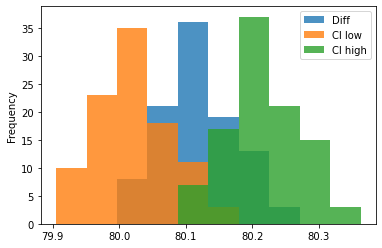

This test should give efficacy of around 0%



C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


             Mean       std
Diff     0.099327  0.114434
CI low  -0.064673  0.114434
CI high  0.263327  0.114434


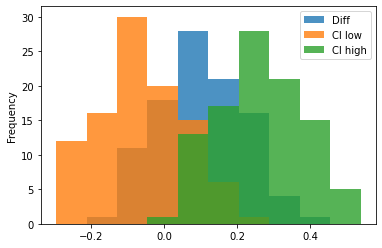

In [238]:
print("This test should give efficacy of around 80%\n")
t = test_side_effects(pipe, p=0.9)
plt.show()

print("This test should give efficacy of around 0%\n")
t = test_side_effects(pipe, p=0.5)

In [75]:
new_treat_data = treat_data[((np.sum(treat_data.iloc[:,2:10],axis=1) > 0.0) 
              | np.sum(outcome_data.iloc[:,2:10],axis=1) > 0.0)]


In [76]:
group_first = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
group_second = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
group_both = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
group_none = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]

C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4289214852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_first = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4289214852.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_second = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4289214852.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_both = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4289214852.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_none = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]


# 2)
The relation we are modelling is whether any of the individuals who had symptoms do not have those symptoms after treatment or got symptoms from the treatment. 

We are not interested in the outcomes for individuals who did not have any symptoms neither before nor after the treatment.

We do this modelling task in a similar way that we did the modelling for vaccine efficacy. Since we now have data from before and after a treatment, we calculate the ratio of people who still have symptoms after treatment to the people who had symptoms before treatment for both the treated group and the control group. 

We estimate the efficacy of the treatments by
$$ 100 \cdot (1-IRR)$$
where IRR is the ratio of the treated incidence rate and not treated incidence rate ([link](https://www.nejm.org/doi/full/10.1056/NEJMoa2034577)). This means that the relationship we model for each symptom is as given below:

$t_1 = P(symptom = 1 | treatment = 1)$ after treatment, $t_0 = P(symptom = 1 | treatment = 1) $ before treatment.

$n_1 = P(symptom = 1 | treatment = 0)$ after treatment, $n_0 = P(symptom = 1 | treatment = 0) $ before treatment

$r_t = t_1 / t_0$ and

$r_n = n_1 / n_0$

to obtain $IRR = 100 * [1 - r_t / r_n]$

In [77]:
new_outcome_data = outcome_data[((np.sum(treat_data.iloc[:,2:10],axis=1) > 0.0) 
              | np.sum(outcome_data.iloc[:,2:10],axis=1) > 0.0)]

In [78]:
outcome_first = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
outcome_second = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
outcome_both = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
outcome_none = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]

C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4031450266.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_first = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4031450266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_second = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4031450266.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_both = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_6792/4031450266.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_none = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]


In [79]:
prior_probs= [(np.sum(new_treat_data[sym]) + np.sum(new_outcome_data[sym])) / (len(new_treat_data) * 2) 
              for sym in symptom_names][2:]

In [80]:
prior_probs = [0.1] * 8

In [81]:
pipe.treatment_efficacy(outcome_second, group_second, outcome_none, group_none, prior_probs[4], "Fever")

Fever          :  25.000 - 95% CI: (-35.695, 91.227)


(25.0, (-35.694992036619674, 91.22669774431864))

In [82]:
pipe.treatment_efficacy(outcome_both, group_both, outcome_none, group_none, 0.1, "Myocarditis")

Myocarditis    : 100.000 - 95% CI: (-196.650, 100.000)


(100.0, (-196.65007445578186, 99.99999999999973))

In [83]:
for outcome_treated, pre_treated, treatment in zip([outcome_first, outcome_second, outcome_both], 
                                        [group_first, group_second, group_both],
                                                ['treatment 1', 'treatment 2', 'both treatments']):
    print(f"{treatment} efficacy:")
    for i, key in enumerate(outcome_data.keys()[2:]):
        #print(key)
        pipe.treatment_efficacy(outcome_treated, pre_treated, outcome_none, group_none, prior_probs[i], key)
    print()

treatment 1 efficacy:
No-Taste/Smell :  33.333 - 95% CI: (-18.637, 75.955)
Fever          :  40.000 - 95% CI: (-120.041, 73.066)
Headache       : 100.000 - 95% CI: (-167.140, 100.000)
Pneumonia      :  80.000 - 95% CI: (30.576, 97.210)
Stomach        : Division by zero - not enough data to compute efficacy
Myocarditis    :   0.000 - 95% CI: (-8964.716, 38.148)
Blood-Clots    : 100.000 - 95% CI: (89.959, 100.000)
Death          :   0.000 - 95% CI: (-1314.273, 61.602)

treatment 2 efficacy:
No-Taste/Smell :  71.429 - 95% CI: (52.651, 97.920)
Fever          :  25.000 - 95% CI: (-37.137, 91.073)
Headache       : 100.000 - 95% CI: (-182.418, 100.000)
Pneumonia      :   0.000 - 95% CI: (-105.003, 64.605)
Stomach        :  33.333 - 95% CI: (-5212.754, 80.301)
Myocarditis    :  75.000 - 95% CI: (-2695.223, 96.651)
Blood-Clots    :  46.154 - 95% CI: (-60.881, 73.106)
Death          :  50.000 - 95% CI: (-374.787, 98.206)

both treatments efficacy:
No-Taste/Smell : 100.000 - 95% CI: (91.471, 100.

In some of the results above, the lower 95% CI boundary is below zero, even though the efficacy was calculated to 100%. This happens because there could be only one person who has a given symptom in the control group, or very few people who had the symptom before treatment in the treatment group. This makes the Beta-Bernoulli posterior distribution more uncertain, which increases the chance that 0 is part of the 95% CI that is estimated by sampling from that posterior distribution.

In the below functions that test the treatment_efficacy function, we first create a random binary matrix with two columns, where the first column is whether the covid-positive person received treatment or not, and the second column is whether the person had the symptom before the treatment.

To get a correlating column for the symptom after treatment; 'y', the column is first set to the flipped bits of the treatment status, modelling a 'perfect' treatment where none of the treated patients have symptoms after the treatment. The column is then modified by multiplying it with a random binary vector where the probability of 1 is set to the p given in the test function. Then, to have this vector correlate with the people who had the symptom before treatment, it is multiplied with the pre-treatment symptom vector.  


In [239]:
def treatment_efficacy_example(pipeline, N=10000, p=1):
    """ Create example data where the treatment is  about p effective, default 1,
    to test the treatment_efficacy function"""
    
    X = pipeline.generate_binary_data(2, N)
    X.columns = [0, 'Target']
    
    # Need to set y 'manually' here
    y = (np.random.choice(2, size=N, p=(1-p, p)) * X[0] ^ 1)  * X.Target 
    y = pd.DataFrame(y, columns=['Target'])
    
    prior_prob = 0.2
    
    # Partition X and y into the groups where treatment is given or not given, and test efficacy
    pipeline.treatment_efficacy(y[X[0] == 1], X[X[0] == 1], y[X[0] == 0], X[X[0] == 0], prior_prob, 'Target')
    
    return X.assign(y=y)


def test_treatment_efficacy(pipeline, num_experiments=100, N=1_000_000, p=0.9):
    """ Create example data where the treatment is  about p effective, default 0.9,
    to test the treatment_efficacy function"""
    
    all_X = pipeline.generate_binary_data(2, N)
    all_X.columns = [0, 'Target']
    
    all_y = (np.random.choice(2, size=N, p=(1-p, p)) * all_X[0] ^ 1) * all_X.Target
    all_y =  pd.DataFrame(all_y, columns=['Target'])
    
    results = pd.DataFrame(columns=["Efficacy", "CI low", "CI high"], dtype=np.float64)
    
    for i in range(num_experiments):
        X, y = pipeline.bootstrap(all_X, all_y,)
        
        prior_prob = 0.2

            # Partition X and y into the groups where treatment is given or not given, and test efficacy
        eff, (low, high) = pipeline.treatment_efficacy(y[X[0] == 1], X[X[0] == 1], y[X[0] == 0], X[X[0] == 0], 
                                                       prior_prob, 'Target', log=False)
        
        results.loc[i] = [eff, low, high]

    pprint(pd.DataFrame({'Mean': results.mean(), 'std': results.std()}))
    
    results.plot.hist(alpha = 0.8)
    
    return results
    

In [240]:
t = treatment_efficacy_example(pipe, p=0.01, N=100_000)

Target         :   1.033 - 95% CI: (0.673, 3.116)


This test should give efficacy of around 80%

               Mean       std
Efficacy  80.013511  0.082496
CI low    79.867748  0.090360
CI high   80.218188  0.089571


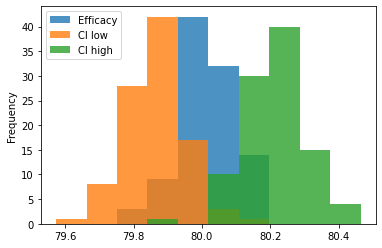

This test should give efficacy of exactly 0%

              Mean       std
Efficacy  0.000000  0.000000
CI low   -0.226688  0.239028
CI high   0.555238  0.236908


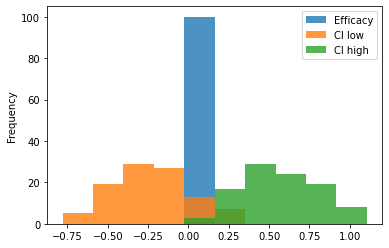

In [241]:
print("This test should give efficacy of around 80%\n")
t = test_treatment_efficacy(pipe, p=0.8)
plt.show()

print("This test should give efficacy of exactly 0%\n")
t = test_treatment_efficacy(pipe, p=0.0)

# 3)

3. Although this data involves people, you are not required to do a formal study of fairness or privacy in this part of the project. However, you are encouraged to describe verbally what possible issues are.

These data are health data and genomic data which are classified as sensitive personal data and have special protection under the law (https://lovdata.no/dokument/NL/lov/2018-06-15-38/KAPITTEL_gdpr-2#gdpr/a9). It is not allowed to use such data unless some conditions are satisfied, such as prior consent from the people the data regards, or specifically for this case that use of the data is necessary for public health concerns. Such use does still require that special measures are taken to ensure that the rights of the registered individuals are protected.

The data we have is very precise, e.g. we have the age and income as decimal numbers with enough precision that they can be used to identify the people the data regards. One way to help rectify this could be to divide the data into age and income groups in a way that gives some k-anonymity with regards to these identifiers. However, considering we have 128 bits of the genome for each person, it is highly unlikely that we can give more than 1-anonymity without dropping this part of the data set.

When it comes to the actual output of our research, it is, however, hard to infer from this output much about the original data. 

In [230]:
X = pipe.generate_binary_data(3, 100)
pprint(pd.DataFrame({'mean': X.mean(), 'std': X.std()}))

   mean       std
0  0.35  0.479372
1  0.51  0.502418
2  0.45  0.500000
